2.2.0
(60000, 28, 28)
60000


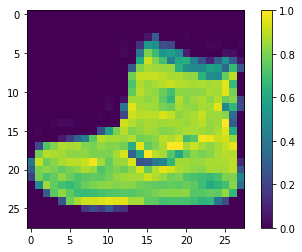

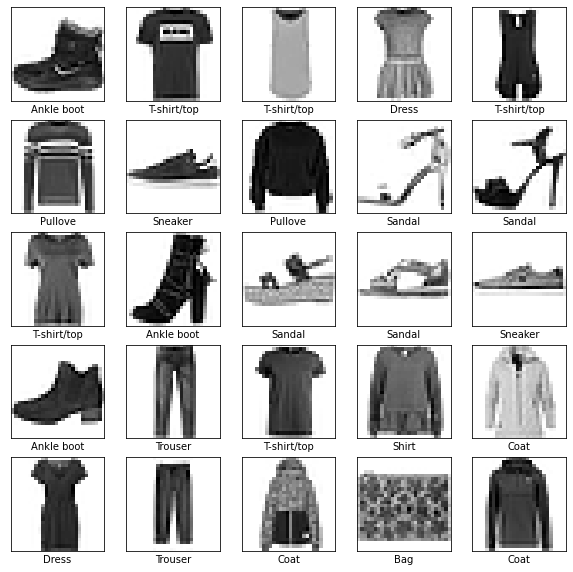

In [2]:

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images.shape)

print(len(train_images))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [4]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5111 - accuracy: 0.8214
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3843 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3436 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3184 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3011 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2862 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2743 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2645 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2537 - accuracy: 0.9049
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - 

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.3510 - accuracy: 0.8768

Test accuracy: 0.876800000667572


In [7]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [8]:
predictions = probability_model.predict(test_images)

In [9]:
predictions[0]

array([1.5930084e-07, 8.8763745e-12, 7.2953405e-08, 3.2727797e-13,
       9.0345097e-08, 1.7161376e-03, 7.9273597e-08, 2.0858703e-02,
       6.5659879e-07, 9.7742403e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])

9

In [11]:
class_names[9]

'Ankle boot'

In [12]:
class_names[test_labels[0]]

'Ankle boot'

In [13]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} (:2.0f)% ({})'.format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))

In [14]:
def plot_value_array(i, predictions_array, true_label):
               true_label = true_label[i]
               plt.grid(False)
               plt.xticks(range(10))
               plt.yticks([])
               thisplot = plt.bar(range(10), predictions_array, color='#777777')
               plt.ylim([0,1])
               predicted_label = np.argmax(predictions_array)
               
               thisplot[predicted_label].set_color('red')
               thisplot[true_label].set_color('blue')

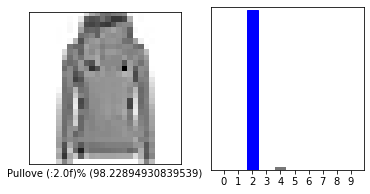

In [15]:
i = 54
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

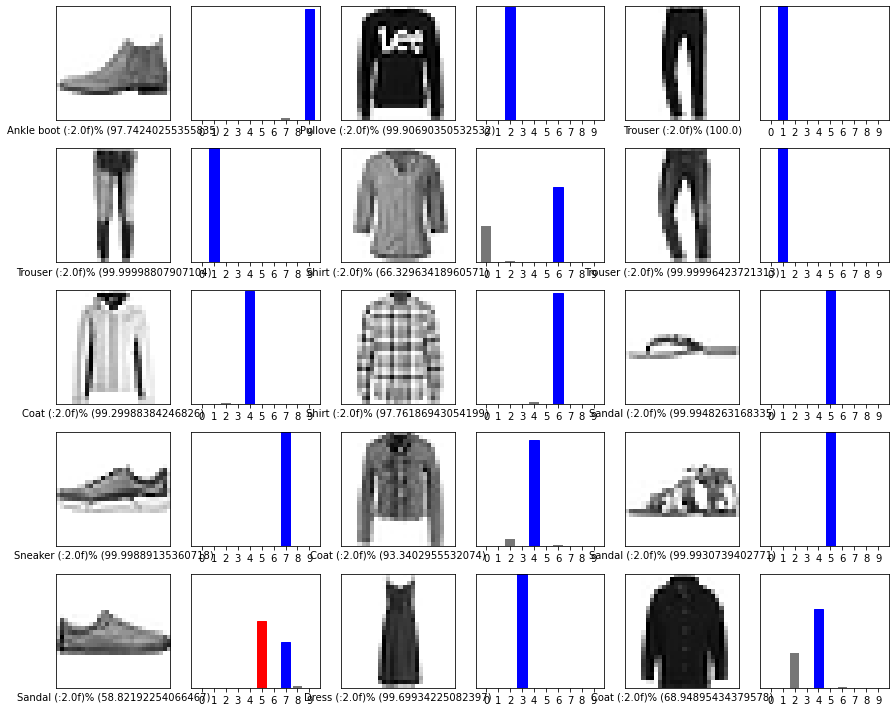

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [17]:
img = test_images[1]
print(img.shape)

(28, 28)


In [19]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [20]:
predictions_single = probability_model.predict(img)

In [21]:
print(predictions_single)

[[1.9635141e-05 4.5796002e-11 9.9906904e-01 2.9671678e-11 8.2833972e-04
  1.1319324e-10 8.3015046e-05 1.9595820e-18 3.7960127e-08 1.0513831e-13]]


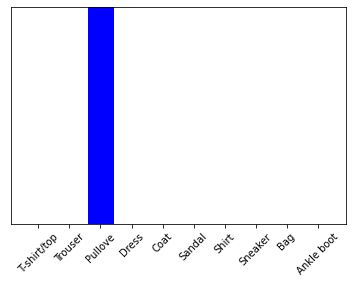

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
class_names[np.argmax(predictions_single[0])]

'Pullove'